In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cantera as ct

In [19]:
def func(T, A, n, Ea):
    return np.log(A) + n*np.log(T)+ (-Ea/(1.987*T))

def calc_rc(T,A,n,Ea):
    k = []
    for temp in T:
        k.append(A *(temp**n)* np.exp(-Ea/ (1.987* temp)))
    return k

In [41]:
df = pd.read_csv('fitting_plog_data_from_lei.csv')
df['760 Torr\xa0']

0     1.030000e-12
1     5.780000e-13
2     3.630000e-13
3     2.440000e-13
4     1.720000e-13
5     1.260000e-13
6     9.460000e-14
7     7.260000e-14
8     5.670000e-14
9     4.490000e-14
10    3.610000e-14
11    2.930000e-14
12    2.400000e-14
13    1.990000e-14
14    1.660000e-14
15    1.390000e-14
16    1.170000e-14
17    9.910000e-15
Name: 760 Torr , dtype: float64

In [21]:
df #Rate constant for H+O2=HO2	 cm3 s-1 molecule-1

,T(K),10 Torr,100 Torr,300 Torr,760 Torr,2280 Torr,7600 Torr,22800 Torr,76000 Torr
0,295,1.420000e-14,1.410000e-13,4.170000e-13,1.030000e-12,2.880000e-12,8.030000e-12,1.770000e-11,3.430000e-11
1,395,7.830000e-15,7.800000e-14,2.320000e-13,5.780000e-13,1.650000e-12,4.840000e-12,1.150000e-11,2.520000e-11
2,495,4.880000e-15,4.870000e-14,1.450000e-13,3.630000e-13,1.050000e-12,3.170000e-12,7.940000e-12,1.870000e-11
3,595,3.270000e-15,3.260000e-14,9.740000e-14,2.440000e-13,7.120000e-13,2.190000e-12,5.680000e-12,1.420000e-11
4,695,2.300000e-15,2.300000e-14,6.860000e-14,1.720000e-13,5.050000e-13,1.580000e-12,4.180000e-12,1.090000e-11
5,795,1.680000e-15,1.670000e-14,5.010000e-14,1.260000e-13,3.710000e-13,1.170000e-12,3.160000e-12,8.500000e-12
6,895,1.260000e-15,1.250000e-14,3.760000e-14,9.460000e-14,2.790000e-13,8.880000e-13,2.430000e-12,6.710000e-12
7,995,9.620000e-16,9.610000e-15,2.880000e-14,7.260000e-14,2.150000e-13,6.870000e-13,1.900000e-12,5.360000e-12
8,1095,7.510000e-16,7.500000e-15,2.250000e-14,5.670000e-14,1.680000e-13,5.400000e-13,1.510000e-12,4.330000e-12
9,1195,5.950000e-16,5.940000e-15,1.780000e-14,4.490000e-14,1.330000e-13,4.300000e-13,1.210000e-12,3.530000e-12


0.013157894736842105 atm
1.6799958521334666e+18 -3.092899499056569 911.606044756004


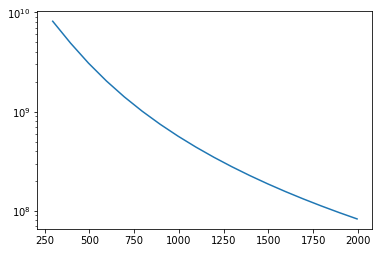

In [26]:
#10 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['10 Torr']*6.023e23))
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(10/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

0.13157894736842105 atm
1.6525633729244803e+19 -3.0907827437552484 912.3588660666799


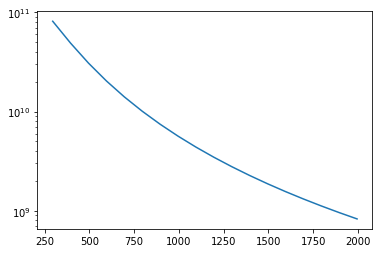

In [27]:
#100 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['100 Torr']*6.023e23))
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(100/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

0.39473684210526316 atm
5.211713098853573e+19 -3.096850366720209 930.1389852011517


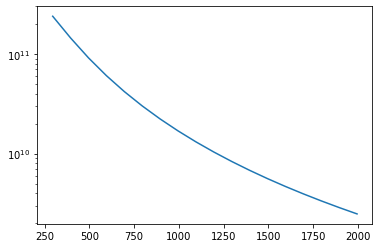

In [38]:
#300 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['300 Torr']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(300/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

1.0 atm
1.318463555175235e+20 -3.096296856450155 945.5011557911573


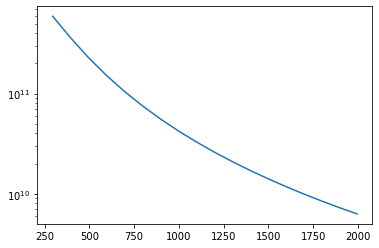

In [42]:
#760 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['760 Torr\xa0']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(760/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

3.0 atm
4.27154801711025e+20 -3.1053483362157643 1001.7009634453558


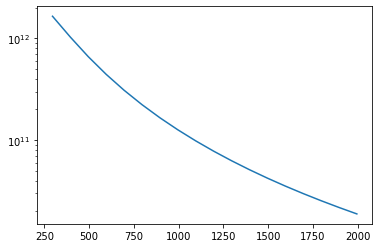

In [43]:
#2280 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['2280 Torr']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(2280/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

10.0 atm
1.4966387926633716e+21 -3.1098002563438842 1120.6396516423015


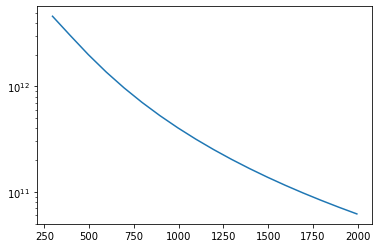

In [44]:
#7600 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['7600 Torr']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(7600/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

30.0 atm
4.5137080063911154e+21 -3.1083990561504997 1310.8756509766445


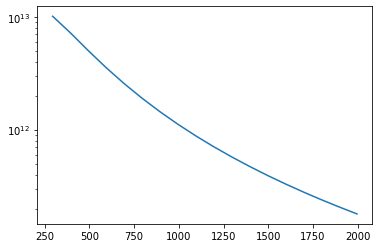

In [45]:
#22800 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['22800 Torr']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(22800/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

100.0 atm
9.702188399940384e+21 -3.0507295089552957 1565.765631930432


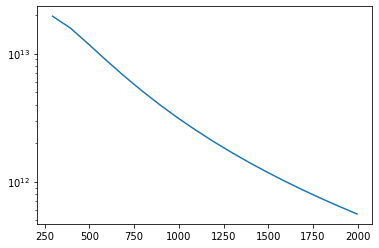

In [46]:
#76000 Torr
popt, pcov = curve_fit(func, df['T(K)'], np.log(df['76000 Torr']*6.023e23),maxfev = 5000)
k_fit = calc_rc(df['T(K)'],popt[0],popt[1],popt[2])
print(76000/760, 'atm')
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T(K)'],k_fit)

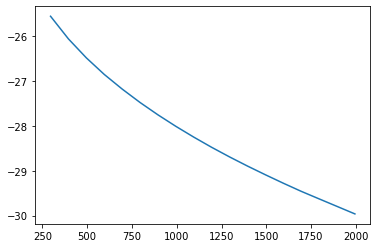

In [12]:
pdep_arrhenius('H + O2 <=> HO2',
               [(0.013157894736842105, 'atm'), 1.6799958521334666e+18, -3.092899499056569, 911.606044756004],
               [(0.13157894736842105, 'atm'), 1.6525633729244803e+19, -3.0907827437552484, 912.3588660666799],
               [(0.39473684210526316, 'atm'), 5.211713098853573e+19, -3.096850366720209, 930.1389852011517],
               [(1.0, 'atm'), 1.318463555175235e+20, -3.096296856450155, 945.5011557911573],
               [(3.0, 'atm'), 4.27154801711025e+20, -3.1053483362157643, 1001.7009634453558],
               [(10.0, 'atm'), 1.4966387926633716e+21, -3.1098002563438842, 1120.6396516423015],
               [(30.0, 'atm'), 4.5137080063911154e+21, -3.1083990561504997, 1310.8756509766445],
               [(100.0, 'atm'), 9.702188399940384e+21, -3.0507295089552957, 1565.765631930432])

In [63]:
gas1 = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_extra_reactions_precursor.cti')
gas1.reaction_equations()[21]

'H + O2 (+M) <=> HO2 (+M)'

Text(0.5, 1.0, 'H + O2 (+M) <=> HO2 (+M)')

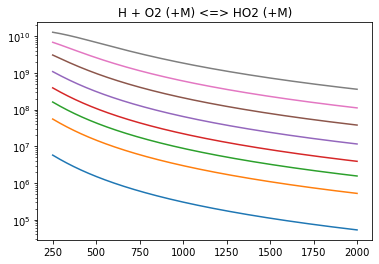

In [77]:
#checking to see if rate constants match
temperature_list = np.arange(250,2000)
pressure_list=[0.013157894736842105,0.13157894736842105,0.39473684210526316,1,3,10,30,100]
gas1 = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_extra_reactions_precursor.cti')
k1=[]
for press in pressure_list:
    pk=[]
    for temp in temperature_list:
        gas1.TPX = temp,press*101325,{'Ar':1}
        pk.append(gas1.forward_rate_constants[21])
    k1.append(pk)
plt.semilogy(temperature_list,k1[0],label=str(pressure_list[0])+'atm')
plt.semilogy(temperature_list,k1[1],label=str(pressure_list[1])+'atm')        
plt.semilogy(temperature_list,k1[2],label=str(pressure_list[2])+'atm')        
plt.semilogy(temperature_list,k1[3],label=str(pressure_list[3])+'atm')        
plt.semilogy(temperature_list,k1[4],label=str(pressure_list[4])+'atm')       
plt.semilogy(temperature_list,k1[5],label=str(pressure_list[5])+'atm')        
plt.semilogy(temperature_list,k1[6],label=str(pressure_list[6])+'atm')  
plt.semilogy(temperature_list,k1[7],label=str(pressure_list[7])+'atm')  
plt.title(gas1.reaction_equations()[21])

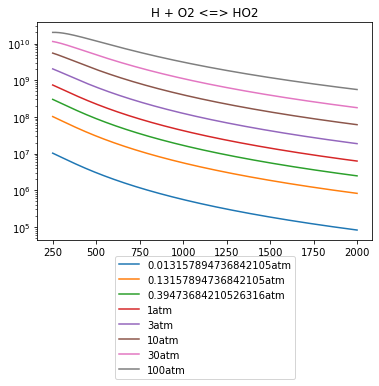

In [78]:
#checking to see if rate constants match
temperature_list = np.arange(250,2000)
pressure_list=[0.013157894736842105,0.13157894736842105,0.39473684210526316,1,3,10,30,100]
gas2 = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_extra_reactions_precursor.cti')
k2=[]
for press in pressure_list:
    pk=[]
    for temp in temperature_list:
        gas2.TPX = temp,press*101325,{'Ar':1}
        pk.append(gas2.forward_rate_constants[21])
    k2.append(pk)
plt.semilogy(temperature_list,k2[0],label=str(pressure_list[0])+'atm')
plt.semilogy(temperature_list,k2[1],label=str(pressure_list[1]) +'atm')       
plt.semilogy(temperature_list,k2[2],label=str(pressure_list[2]) +'atm')         
plt.semilogy(temperature_list,k2[3],label=str(pressure_list[3]) +'atm')         
plt.semilogy(temperature_list,k2[4],label=str(pressure_list[4]) +'atm')      
plt.semilogy(temperature_list,k2[5],label=str(pressure_list[5]) +'atm')      
plt.semilogy(temperature_list,k2[6],label=str(pressure_list[6]) +'atm')   
plt.semilogy(temperature_list,k2[7],label=str(pressure_list[7]) +'atm')   
plt.title(gas2.reaction_equations()[21])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

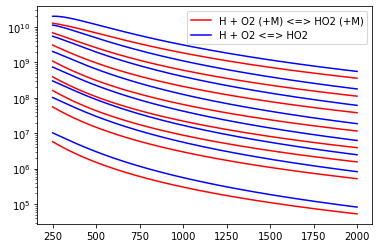

In [79]:
plt.semilogy(temperature_list,k1[0],'r',label='H + O2 (+M) <=> HO2 (+M)')
plt.semilogy(temperature_list,k1[1],'r')        
plt.semilogy(temperature_list,k1[2],'r')        
plt.semilogy(temperature_list,k1[3],'r')        
plt.semilogy(temperature_list,k1[4],'r')        
plt.semilogy(temperature_list,k1[5],'r')        
plt.semilogy(temperature_list,k1[6],'r')  
plt.semilogy(temperature_list,k1[7],'r') 




plt.semilogy(temperature_list,k2[0],'b',label='H + O2 <=> HO2')
plt.semilogy(temperature_list,k2[1],'b')        
plt.semilogy(temperature_list,k2[2],'b')        
plt.semilogy(temperature_list,k2[3],'b')        
plt.semilogy(temperature_list,k2[4],'b')        
plt.semilogy(temperature_list,k2[5],'b')        
plt.semilogy(temperature_list,k2[6],'b')  
plt.semilogy(temperature_list,k2[7],'b')  
plt.legend()